# Report for mini-project 1

Student: Lucas Gerretsen

Instructor: M. Lepetit

Deadline: 21/12/2018

In [103]:
import mp1
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import keras
from tqdm import tqdm_notebook as tqdm

print(mp1.IMAGE_SIZE)

72


<module 'mp1' from '/home/lucas/Documents/MVA/DL/MP1/mp1.py'>

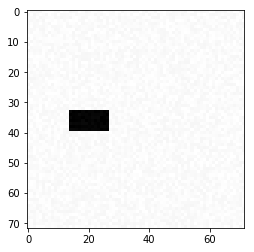

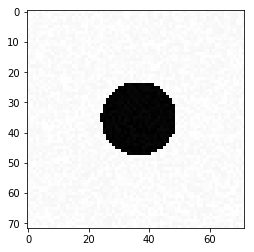

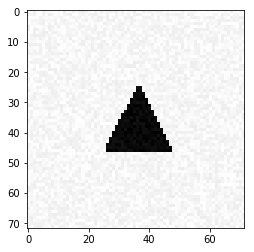

In [4]:
reload(mp1)

## Q3

Our goal here is to train and evaluate a simple linear network on recognizing shapes: rectangle/disk/triangle.

In [35]:
# generate a train set
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)
Y_train = np.eye(3)[Y_train.astype(int)] # equivalent to keras.utils.np_utils.to_categorical()
print(X_train.shape,Y_train.shape)

Creating data:



Categories: rectangle/disk/triangle
(300, 5184) (300, 3)


In [50]:
# generate a test set
[X_test, Y_test] = mp1.generate_dataset_classification(60, 20)
Y_test = np.eye(3)[Y_test.astype(int)] # equivalent to keras.utils.np_utils.to_categorical()

Creating data:



Categories: rectangle/disk/triangle


In [73]:
# build a 1-layer, dense model
# we perform softmax on the output for this categorization problem and use appropriate loss and metric
model = keras.models.Sequential()
model.add(keras.layers.Dense(3,activation=keras.activations.softmax)) # 3 outputs for the 3 categories
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

In [90]:
model.fit(x=X_train,y=Y_train,epochs=1,batch_size=32,verbose=0)
model.evaluate(X_test,Y_test)

60/60 [==============================] - 0s 6ms/step


[0.47036295334498085, 0.6833333412806193]

In [109]:
def reset_weights(model):
    """
    Reset all weights in layers of model by running their initializer
    """
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=keras.backend.get_session())

# parameters for our experiment
n_exp = 3
n_epochs_s = [1,2,3,5,7,10,15]

# record stats - 0 = train/test - 1 = n_epochs - 2 = it_exp
record_loss = np.zeros((2,len(n_epochs_s),n_exp))
record_acc = np.zeros((2,len(n_epochs_s),n_exp))

for it_epochs,epochs in enumerate(tqdm(n_epochs_s)): # test different number of epochs
    for it in range(n_exp): # reproduce the experiment a few times
        # reset the model
        reset_weights(model)
        # train the model
        model.fit(x=X_train,y=Y_train,epochs=epochs,batch_size=32,verbose=0)
        # evaluate the model on train set
        loss,acc = model.evaluate(X_train,Y_train,verbose=0)
        record_loss[0,it_epochs,it] = loss
        record_acc[0,it_epochs,it] = acc
        # evaluate the model on test set
        loss,acc = model.evaluate(X_test,Y_test,verbose=0)
        record_loss[1,it_epochs,it] = loss
        record_acc[1,it_epochs,it] = acc

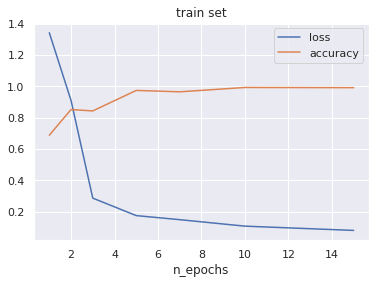

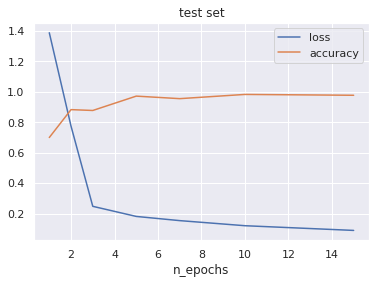

In [110]:
plt.figure(1) # plot stats for train set
plt.plot(n_epochs_s,record_loss[0,:,:].mean(axis=1),label='loss')
plt.plot(n_epochs_s,record_acc[0,:,:].mean(axis=1),label='accuracy')
plt.xlabel('n_epochs')
plt.title('train set')
plt.legend()

plt.figure(2) # plot stats for test set
plt.plot(n_epochs_s,record_loss[1,:,:].mean(axis=1),label='loss')
plt.plot(n_epochs_s,record_acc[1,:,:].mean(axis=1),label='accuracy')
plt.xlabel('n_epochs')
plt.legend()
plt.title('test set')
plt.show()